# Hungarian Algorithm for Topic Alignment

```
Author:
Zach Wolpe
zachcolinwolpe@gmail.com
zachwolpe.com
```

Utilize the Hungarian sorting algorithm to align topics learned from different LDA models. LDA topics modeling is unsupervised & as such we have no way of determining whether or not Topic i of the first model is the same as Topic i of the second model.

The Hungarian algorithm can be used to efficiently align topics with high correlation.

In [104]:
import numpy as np
import pandas as pd
from hungarian import Hungarian
import matplotlib.pyplot as plt
plt.style.use('default')

In [105]:
# Import models
# model training times
import pickle

# 5 Topics
pickle_in = open('results_pymc3_5Topics.pkl', 'rb')
results_pymc3_5Topics = pickle.load(pickle_in)
pickle_in = open('results_Sklearn_5Topics.pkl', 'rb')
results_Sklearn_5Topics = pickle.load(pickle_in)

# 10 Topics
pickle_in = open('results_pymc3_10Topics.pkl', 'rb')
results_pymc3_10Topics = pickle.load(pickle_in)
pickle_in = open('results_Sklearn_10Topics.pkl', 'rb')
results_Sklearn_10Topics = pickle.load(pickle_in)

# 20 Topics
pickle_in = open('results_pymc3_20Topics.pkl', 'rb')
results_pymc3_20Topics = pickle.load(pickle_in)
pickle_in = open('results_Sklearn_20Topics.pkl', 'rb')
results_Sklearn_20Topics = pickle.load(pickle_in)

# 30 Topics
pickle_in = open('results_pymc3_30Topics.pkl', 'rb')
results_pymc3_30Topics = pickle.load(pickle_in)
pickle_in = open('results_Sklearn_30Topics.pkl', 'rb')
results_Sklearn_30Topics = pickle.load(pickle_in)

# Hungarian Formula

In [106]:
def Hungarian_Solution(topic_A, topic_B):
    """
    Return Hungarian Algorithm Results
    
    topic_A: theta A
    topic_B: theta B
    """

    ## theta by theta
    #create an empty array for document correlation (size: topic x topic)
    doc_corr = np.zeros((np.shape(topic_A)[1], np.shape(topic_A)[1]))

    #fill the array:
    #for each topic in language A:
    for t in range(np.shape(topic_A)[1]):

    #  %for each topic in language B:
        for r in range(np.shape(topic_A)[1]):
            corr = np.corrcoef(topic_A[:,t],topic_B[:,r])
            doc_corr[t,r] = corr[0,1]

    print("Average correlation BEFORE alignment:\t",np.mean(np.diagonal(doc_corr)))
    print('\n')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(doc_corr)
    fig.colorbar(cax)

    hungarian = Hungarian(doc_corr, is_profit_matrix=True)
    hungarian.calculate()

    topic_assignment = hungarian.get_results()
    print("Topic assignment (topic A, topic B):\n", topic_assignment)
    print('\n')
    
    
    
    
    ################################################## BREAK ##################################################

    #new topic_A matrix (after alignment)
    new_topic_A = np.zeros((np.shape(topic_A)[0], np.shape(topic_A)[1]))
    for r in range(np.shape(topic_A)[1]):
        new_topic_A[:,r] = topic_A[:, topic_assignment[r][0]]

    #new topic_B matrix (after alignment)
    new_topic_B = np.zeros((np.shape(topic_B)[0], np.shape(topic_B)[1]))
    for r in range(np.shape(topic_B)[1]):
        new_topic_B[:,r] = topic_B[:, topic_assignment[r][1]]

    #### AFTER ALIGNMENT #####
    #create an empty array for document correlation (size: topic x topic)
    doc_corr = np.zeros((np.shape(topic_A)[1], np.shape(topic_A)[1]))
    
    
    
    
    ################################################## BREAK ##################################################
    
    #fill the array:
    #for each doc in language A:
    for t in range(np.shape(topic_A)[1]):

    #    %for each doc in language B (with new alignments):
        for r in range(np.shape(topic_A)[1]):
            corr = np.corrcoef(new_topic_A[:,t],new_topic_B[:,r])
            doc_corr[t,r] = corr[0,1]

    print("Average correlation AFTER alignment:\t", np.mean(np.diagonal(doc_corr)))
    # plot correlation matrix
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(doc_corr)
    fig.colorbar(cax)
    ticks = np.arange(0,np.shape(topic_A)[1]-1,5)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    #Visualise distribution of diagonal correlations
    fig = plt.figure()        
    plt.hist(np.diagonal(doc_corr),10)
    plt.show()
    

# Dummy data
# dummy topic A
topic_A = np.array([[0.1, 0.2, 0.7, 0.8],
        [0.2, 0.5, 0.3, 0.3],
        [0.5, 0.3, 0.2, 0.1]])

# dummy topic B
topic_B = np.array([[0.1, 0.5, 0.07, 0.3],
        [0.2, 0.5, 0.3, 0.2],
        [0.3, 0.3, 0.2, 0.1]])

# 5 Topic Models

Average correlation BEFORE alignment:	 0.03305198914208711


Topic assignment (topic A, topic B):
 [(0, 2), (1, 4), (3, 3), (4, 1), (2, 0)]


Average correlation AFTER alignment:	 0.5539154159746807


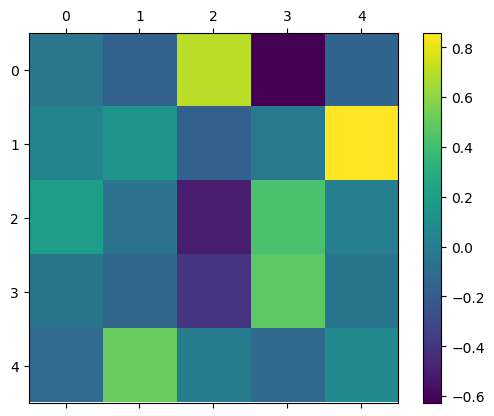

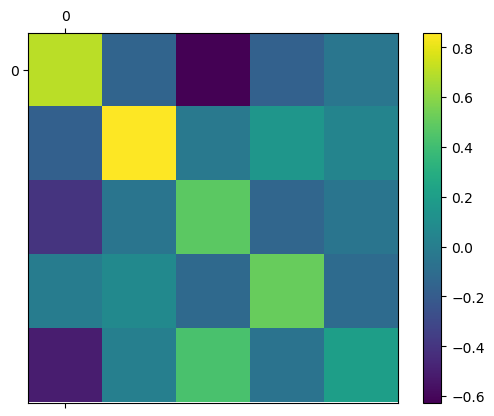

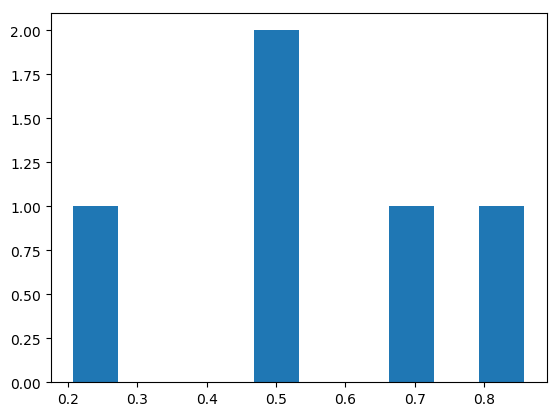

In [108]:
theta_pymc3 = results_pymc3_5Topics['thetass'][0]
theta_sklearn = results_Sklearn_5Topics['theta']


Hungarian_Solution(theta_pymc3, theta_sklearn)

# select 1 of the 100 nested arrays for the Theta matrix
# all 100 appear identical: check np.array(pymc3_theta).shape

# 10 Topics

Average correlation BEFORE alignment:	 -0.025614342360524255


Topic assignment (topic A, topic B):
 [(0, 8), (2, 4), (3, 0), (5, 9), (6, 5), (8, 1), (7, 6), (4, 7), (1, 3), (9, 2)]


Average correlation AFTER alignment:	 0.4330768386406968


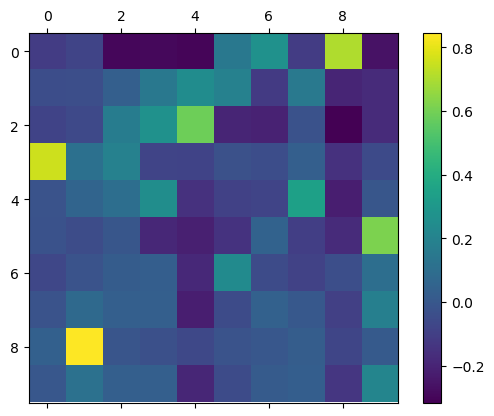

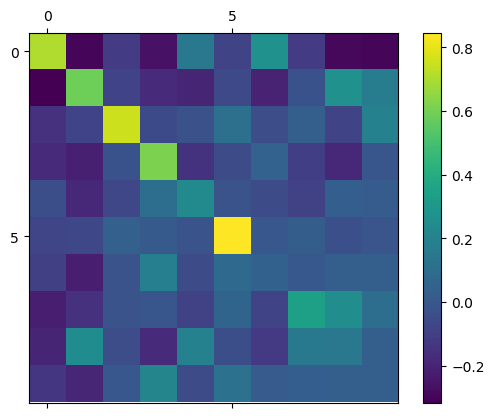

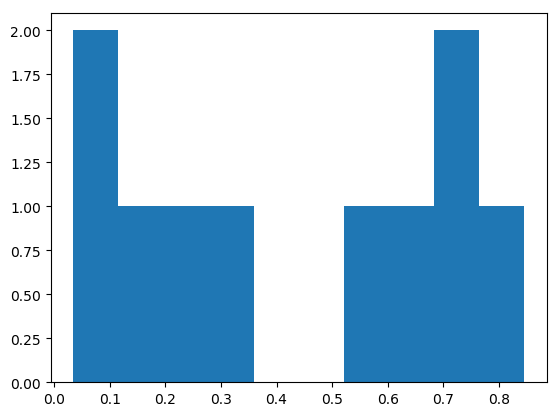

In [95]:
theta_pymc3 = results_pymc3_10Topics['thetass'][0]
theta_sklearn = results_Sklearn_10Topics['theta']

Hungarian_Solution(theta_pymc3, theta_sklearn)

# 20 Topics

Average correlation BEFORE alignment:	 0.0484917437713949


Topic assignment (topic A, topic B):
 [(0, 0), (2, 10), (3, 6), (4, 2), (6, 3), (7, 12), (8, 15), (9, 14), (11, 19), (13, 17), (16, 5), (17, 13), (18, 11), (19, 7), (1, 16), (5, 8), (10, 1), (14, 4), (15, 9), (12, 18)]


Average correlation AFTER alignment:	 0.23664616646323822


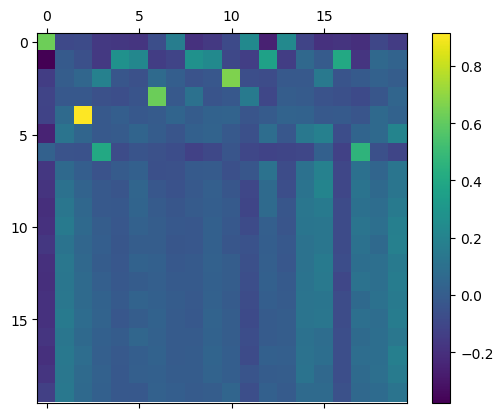

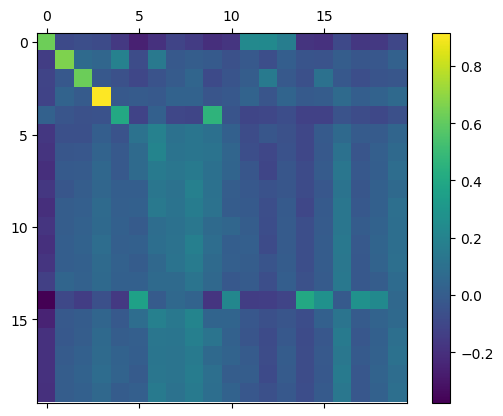

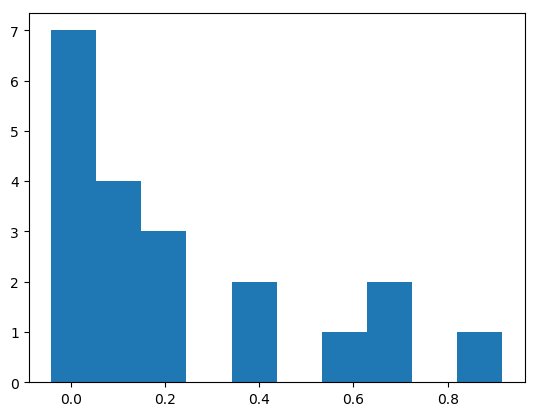

In [96]:
theta_pymc3 = results_pymc3_20Topics['thetass'][0]
theta_sklearn = results_Sklearn_20Topics['theta']

Hungarian_Solution(theta_pymc3, theta_sklearn)

# 30 Topics

Average correlation BEFORE alignment:	 0.06184075430504123


Topic assignment (topic A, topic B):
 [(0, 1), (1, 15), (3, 19), (4, 29), (5, 22), (6, 27), (8, 9), (9, 8), (11, 16), (14, 21), (19, 17), (20, 5), (21, 3), (26, 2), (27, 23), (2, 14), (7, 28), (13, 7), (18, 20), (28, 24), (24, 4), (10, 10), (29, 12), (22, 6), (16, 13), (23, 11), (12, 18), (25, 26), (15, 0), (17, 25)]


Average correlation AFTER alignment:	 0.23399262458293177


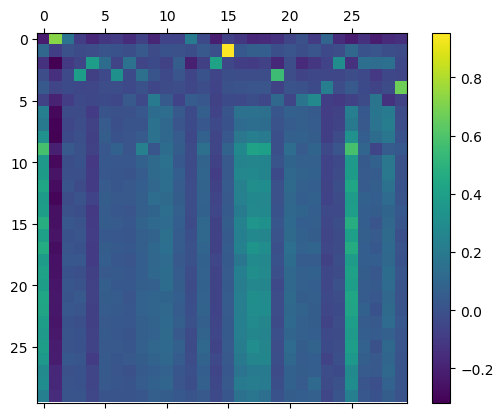

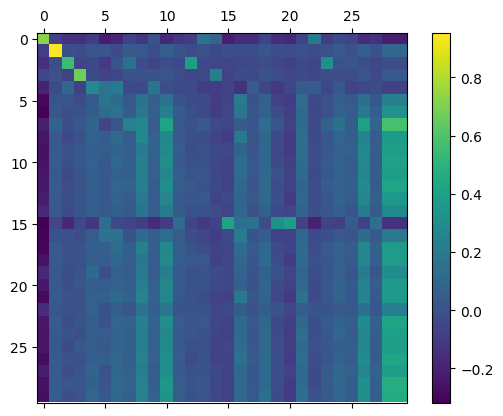

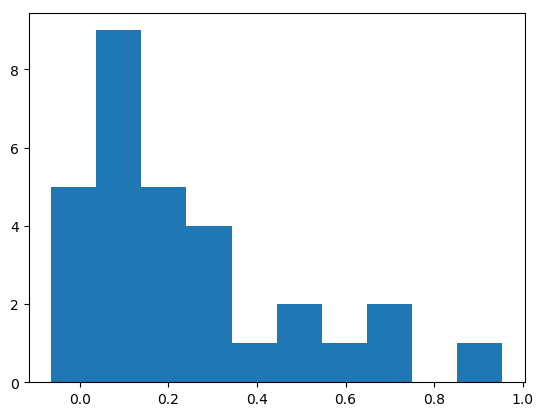

In [97]:
theta_pymc3 = results_pymc3_30Topics['thetass'][0]
theta_sklearn = results_Sklearn_30Topics['theta']

Hungarian_Solution(theta_pymc3, theta_sklearn)